<a href="https://colab.research.google.com/github/nidhib99/DeepLearning/blob/master/DL_Test2_J006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')
!ls drive/"My Drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
'2020 Calendar.gsheet'
 5_6140728533678293179.gdoc
 5_6323358531743383590.gdoc
 Activities.gdoc
'AI REPORT.gdoc'
'Answers to assignment#1.gdoc'
'BDSS PPT.gslides'
 Camera
'Case study.gslides'
 CGRating.csv
 CGRating.gsheet
 COI
'Colab Notebooks'
'Colab Notebooks (1)'
'Dec Trip.gdoc'
'Draft Intern Application.gdoc'
 EGRating.csv
 EGRating.gsheet
'FIM PPT.gdoc'
 green_mountains_rocky.jpg
'Group 9 - Real Time Object Recognition For Visually Impaired.gdoc'
 HelpMe

In [0]:
X=[]
Z=[]
IMG_SIZE=150

AGRICULTURAL_DIR='drive/My Drive/UCMerced_LandUse/Images/agricultural' 
AIRPLANE_DIR='drive/My Drive/UCMerced_LandUse/Images/airplane'
BASEBALLDIAMOND_DIR='drive/My Drive/UCMerced_LandUse/Images/baseballdiamond'
BEACH_DIR='drive/My Drive/UCMerced_LandUse/Images/beach'
BUILDINGS_DIR='drive/My Drive/UCMerced_LandUse/Images/buildings'
CHAPARRAL_DIR='drive/My Drive/UCMerced_LandUse/Images/chaparral'
DENSERESIDENTIAL_DIR='drive/My Drive/UCMerced_LandUse/Images/denseresidential'
FOREST_DIR='drive/My Drive/UCMerced_LandUse/Images/forest'
FREEWAY_DIR='drive/My Drive/UCMerced_LandUse/Images/freeway'
GOLFCOURSE_DIR='drive/My Drive/UCMerced_LandUse/Images/golfcourse'
HARBOR_DIR='drive/My Drive/UCMerced_LandUse/Images/harbor'
INTERSECTION_DIR='drive/My Drive/UCMerced_LandUse/Images/intersection'
MEDIUMRESIDENTIAL_DIR='drive/My Drive/UCMerced_LandUse/Images/mediumresidential'
MOBILEHOMEPARK_DIR='drive/My Drive/UCMerced_LandUse/Images/mobilehomepark'
OVERPASS_DIR='drive/My Drive/UCMerced_LandUse/Images/overpass'
PARKINGLOT_DIR='drive/My Drive/UCMerced_LandUse/Images/parkinglot'
RIVER_DIR='drive/My Drive/UCMerced_LandUse/Images/river'
RUNWAY_DIR='drive/My Drive/UCMerced_LandUse/Images/runway'
SPARSERESIDENTIAL_DIR='drive/My Drive/UCMerced_LandUse/Images/sparseresidential'
STORAGETANKS_DIR='drive/My Drive/UCMerced_LandUse/Images/storagetanks'
TENNISCOURT_DIR='drive/My Drive/UCMerced_LandUse/Images/tenniscourt'

In [0]:
def assign_label(img,image_type):
    return image_type

In [0]:
def make_train_data(image_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,image_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [0]:
from tqdm import tqdm

In [0]:
make_train_data('Agricultural',AGRICULTURAL_DIR)
print(len(X))

100%|██████████| 100/100 [00:44<00:00,  2.75it/s]

100


In [0]:
make_train_data('Airplane',AIRPLANE_DIR)
print(len(X))

100%|██████████| 100/100 [00:42<00:00,  2.76it/s]

200


In [0]:
make_train_data('Baseball Diamond',BASEBALLDIAMOND_DIR)
print(len(X))

100%|██████████| 100/100 [00:41<00:00,  2.12it/s]

300


In [0]:
make_train_data('Beach',BEACH_DIR)
print(len(X))

100%|██████████| 100/100 [00:40<00:00,  2.25it/s]

400


In [0]:
make_train_data('Buildings',BUILDINGS_DIR)
print(len(X))

100%|██████████| 100/100 [00:48<00:00,  2.27it/s]

500


In [0]:
make_train_data('Chaparral',CHAPARRAL_DIR)
print(len(X))

100%|██████████| 100/100 [00:48<00:00,  1.22it/s]

600


In [0]:
make_train_data('Chaparral',CHAPARRAL_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 434.77it/s]

700


In [0]:
make_train_data('Forest',FOREST_DIR)
print(len(X))

100%|██████████| 100/100 [00:50<00:00,  2.19it/s]

800


In [0]:
make_train_data('Freeway',FREEWAY_DIR)
print(len(X))

100%|██████████| 100/100 [00:50<00:00,  2.30it/s]

900


In [0]:
make_train_data('Golfcourse',GOLFCOURSE_DIR)
print(len(X))

100%|██████████| 100/100 [00:45<00:00,  2.31it/s]

1000


In [0]:
make_train_data('Harbor',HARBOR_DIR)
print(len(X))

100%|██████████| 100/100 [00:44<00:00,  2.48it/s]

1100


In [0]:
make_train_data('Intersection',INTERSECTION_DIR)
print(len(X))

100%|██████████| 100/100 [00:48<00:00,  2.14it/s]

1200


In [0]:
make_train_data('Medium Residential',MEDIUMRESIDENTIAL_DIR)
print(len(X))

100%|██████████| 100/100 [00:53<00:00,  1.43it/s]

1300


In [0]:
make_train_data('Mobile Home Park',MOBILEHOMEPARK_DIR)
print(len(X))

100%|██████████| 100/100 [00:45<00:00,  2.26it/s]

1400


In [0]:
make_train_data('Overpass',OVERPASS_DIR)
print(len(X))

100%|██████████| 100/100 [00:48<00:00,  1.72it/s]

1500


In [0]:
make_train_data('Parking Lot',PARKINGLOT_DIR)
print(len(X))

100%|██████████| 100/100 [00:51<00:00,  2.60it/s]

1600


In [0]:
make_train_data('River',RIVER_DIR)
print(len(X))

100%|██████████| 100/100 [00:52<00:00,  2.23it/s]

1700


In [0]:
make_train_data('Runway',RUNWAY_DIR)
print(len(X))

100%|██████████| 100/100 [00:41<00:00,  2.84it/s]

1800


In [0]:
make_train_data('Sparse Residential',SPARSERESIDENTIAL_DIR)
print(len(X))

100%|██████████| 100/100 [00:39<00:00,  2.75it/s]

1900


In [0]:
make_train_data('Storage Tanks',STORAGETANKS_DIR)
print(len(X))

100%|██████████| 100/100 [00:43<00:00,  2.82it/s]

2000


In [0]:
make_train_data('Tennis Court',TENNISCOURT_DIR)
print(len(X))

100%|██████████| 100/100 [00:43<00:00,  2.35it/s]

2100


In [0]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,21)
X=np.array(X)
X=X/255

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [0]:
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

In [0]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(21, activation = "softmax"))

In [0]:
batch_size=21
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [0]:
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 96)       

In [0]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test), 
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))




Epoch 1/50





75/75 [==============================] - 24s 316ms/step - loss: 0.1844 - acc: 0.9525 - val_loss: 0.1699 - val_acc: 0.9517
Epoch 2/50
75/75 [==============================] - 8s 112ms/step - loss: 0.1649 - acc: 0.9537 - val_loss: 0.1485 - val_acc: 0.9558
Epoch 3/50
75/75 [==============================] - 8s 110ms/step - loss: 0.1419 - acc: 0.9570 - val_loss: 0.1551 - val_acc: 0.9545
Epoch 4/50
75/75 [==============================] - 8s 111ms/step - loss: 0.1399 - acc: 0.9571 - val_loss: 0.1276 - val_acc: 0.9585
Epoch 5/50
75/75 [==============================] - 9s 114ms/step - loss: 0.1275 - acc: 0.9592 - val_loss: 0.1072 - val_acc: 0.9632
Epoch 6/50
75/75 [==============================] - 8s 113ms/step - loss: 0.1164 - acc: 0.9612 - val_loss: 0.1120 - val_acc: 0.9619
Epoch 7/50
75/75 [==============================] - 9s 114ms/step - loss: 0.1056 - acc: 0.9633 - val_loss: 0.1049 - val_acc: 0.9636
Epoch 8/50
75/75 [==============================] - 8s 110ms/step -

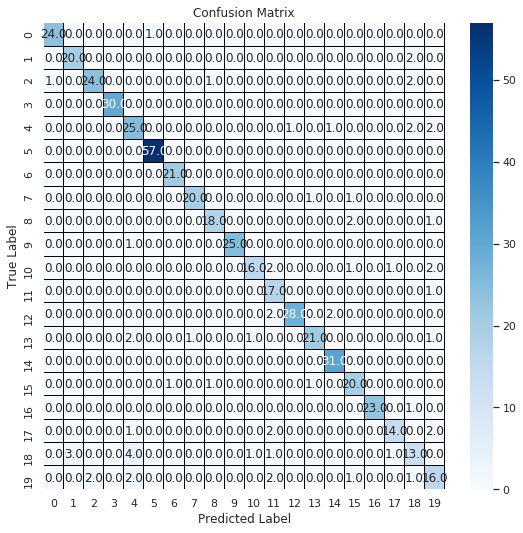

In [0]:
import seaborn as sns
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="black", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

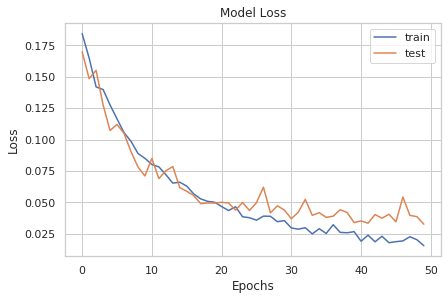

In [0]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

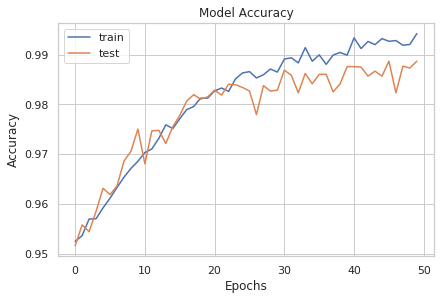

In [0]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()